In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint and parameters
url = "https://api.fda.gov/drug/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    #recall_df.to_csv('output_data/fda_drug_enforcement_data.csv', index=False)

In [4]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     
                                    
                                    })

clean_df.head()


,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Report Date,Code Info,Termination Date,more_code_info
0,Ongoing,San Juan Del Rio,N/A,Mexico,Class II,{},Drugs,86162,Albek De Mexico S.A. De C.V.,Oriente Cuatro No. 11 Nuevo,...,D-0080-2021,Assured Instant Hand Sanitizer Aloe & Moisturi...,"27,000 bottles",CGMP Deviations: Next Advanced Antibacterial H...,20200730,20201117,20201125,1931102AL,NaN,NaN
1,Terminated,Parsippany,NJ,United States,Class II,"{'application_number': ['ANDA040422'], 'brand_...",Drugs,85712,Teva Pharmaceuticals USA,400 Interpace Pkwy,...,D-1285-2020,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20200604,20200610,"Lot #: 42614718, Exp. date 02/2021",20210525,NaN
2,Terminated,Allegan,MI,United States,Class II,"{'application_number': ['M012'], 'brand_name':...",Drugs,88905,Perrigo Company PLC,515 Eastern Ave,...,D-0623-2022,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20220223,20220302,"Batch: 1BK0964, Exp 01/31/2023",20230929,
3,Ongoing,Dania Beach,FL,United States,Class II,"{'application_number': ['part348'], 'brand_nam...",Drugs,94788,Little Moon Essentials LLC,501 Old Griffin Rd,...,D-0572-2024,"Little Moon Essentials, Crampy Belly Rub (Camp...",788 glass jars,CGMP deviations,20240620,20240702,20240710,lot code No Expiration Date on product: a) 22...,NaN,NaN
4,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['NDA200796'], 'brand_n...",Drugs,87512,Cardinal Health Inc.,7000 Cardinal Pl,...,D-0429-2021,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20210524,20210602,78902-1,20240617,NaN


In [5]:
#Save cleaned DataFrame to output
clean_df.to_csv('output_data/fda_drug_enforcement_data.csv', index=False)

In [6]:
recalling_firm_df = clean_df["Recalling Firm"].unique()
recalling_firm_count_df = len(recalling_firm_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )

Total amount of unique Recalling Firms associated to the FDA Recalls is 187


In [7]:
firm_count_df = clean_df["Recalling Firm"].value_counts().head(10)

print(firm_count_df)

Recalling Firm
Cardinal Health Inc.                                 20
Central Admixture Pharmacy Services, Inc.            19
Akorn, Inc.                                          19
Vita Pharmacy, LLC dba Talon Compounding Pharmacy    18
Mckesson Medical-Surgical Inc. Corporate Office      16
Family Dollar Stores, Llc.                           12
Central Admixture Pharmacy Services Inc              11
Herbal Doctor Remedies                               10
Preferred Pharmaceuticals, Inc.                      10
Teva Pharmaceuticals USA                              8
Name: count, dtype: int64


In [8]:
# Amount of each class of drug recalls
clean_df['Classification'].value_counts()

Classification
Class II     405
Class I       48
Class III     47
Name: count, dtype: int64

In [17]:
#Clean DataFrame to only USA
US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]             
US_recalls_df.head()

,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Report Date,Code Info,Termination Date,more_code_info
1,Terminated,Parsippany,NJ,United States,Class II,"{'application_number': ['ANDA040422'], 'brand_...",Drugs,85712,Teva Pharmaceuticals USA,400 Interpace Pkwy,...,D-1285-2020,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20200604,20200610,"Lot #: 42614718, Exp. date 02/2021",20210525,NaN
2,Terminated,Allegan,MI,United States,Class II,"{'application_number': ['M012'], 'brand_name':...",Drugs,88905,Perrigo Company PLC,515 Eastern Ave,...,D-0623-2022,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20220223,20220302,"Batch: 1BK0964, Exp 01/31/2023",20230929,
4,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['NDA200796'], 'brand_n...",Drugs,87512,Cardinal Health Inc.,7000 Cardinal Pl,...,D-0429-2021,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20210524,20210602,78902-1,20240617,NaN
5,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['ANDA077857'], 'brand_...",Drugs,89450,CARDINAL HEALTHCARE,7200 Cardinal Pl W,...,D-0179-2024,"Enoxaparin Sodium Injection, USP, 150MG/ML Sin...",2 units,CGMP Deviations: Products were exposed to temp...,20220126,20231226,20240103,Batch SAH06821A,20240929,
8,Terminated,Brookhaven,NY,United States,Class II,{},Drugs,85386,"Amneal Pharmaceuticals of New York, LLC",50 Horseblock Rd,...,D-1253-2020,"Nizatidine Oral Solution, 15 mg/mL (75 mg/5mL)...",11258 bottles,CGMP Deviations: potential N-Nitrosodimethylam...,20200415,20200424,20200506,06598004A 04/2020 06599001A 12/2020 06599002...,20210908,NaN


In [18]:
#Cut down DataFrame further to specified columns
US_recalls_df= US_recalls_df[['Status', 'City', 'State', 'Country', 'Classification', 'Product Type', 'Recalling Firm', 'Product Description', 'Product Quantity', 'Reason for Recall', 'Recall Initiation Date', 'Termination Date']]

US_recalls_df.head()

,Status,City,State,Country,Classification,Product Type,Recalling Firm,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Termination Date
1,Terminated,Parsippany,NJ,United States,Class II,Drugs,Teva Pharmaceuticals USA,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20210525
2,Terminated,Allegan,MI,United States,Class II,Drugs,Perrigo Company PLC,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20230929
4,Terminated,Dublin,OH,United States,Class II,Drugs,Cardinal Health Inc.,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20240617
5,Terminated,Dublin,OH,United States,Class II,Drugs,CARDINAL HEALTHCARE,"Enoxaparin Sodium Injection, USP, 150MG/ML Sin...",2 units,CGMP Deviations: Products were exposed to temp...,20220126,20240929
8,Terminated,Brookhaven,NY,United States,Class II,Drugs,"Amneal Pharmaceuticals of New York, LLC","Nizatidine Oral Solution, 15 mg/mL (75 mg/5mL)...",11258 bottles,CGMP Deviations: potential N-Nitrosodimethylam...,20200415,20210908


In [11]:
US_recalls_df.to_csv('output_data/us_recalls_data.csv', index=False)

In [19]:
# Amount of recalls per state
US_recalls_df['State'].value_counts()

State
NJ    54
TX    34
CA    31
OH    28
NY    23
VA    21
FL    14
CT    11
PA    11
NC    10
GA     8
MI     8
TN     6
IL     4
NM     4
WV     4
VT     4
PR     3
WA     3
MD     3
SC     3
IA     3
MO     3
OR     3
MN     3
AR     3
UT     2
CO     2
MA     2
LA     1
AZ     1
KY     1
DE     1
Name: count, dtype: int64

In [ ]:
# MAKE GRAPHS AND VISUALIZATIONS 

#Which classification was recalled most and where.
#	-Class I
#	-Class II
#	-Class III
#Which companies had the most recalls
#	-Which type of drugs did they have recalled.
#How much time it takes to close a recall.
#	-who took most time to recall.

In [26]:
#Class I recall DataFrame
classI_df = US_recalls_df[US_recalls_df['Classification'] == 'Class I']

classI_df.head()

,Status,City,State,Country,Classification,Product Type,Recalling Firm,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Termination Date
9,Terminated,Bolingbroke,GA,United States,Class I,Drugs,SG24 LLC,SkinGuard 24 All-Day Hand Sanitizer 8 oz. bott...,9600 bottles,Marketed without an Approved NDA/ANDA; product...,20200814,20230605
22,Terminated,Chattanooga,TN,United States,Class I,Drugs,Aroma Release Technologies Inc,Klean Touch Hand Sanitizer (Ethyl Alcohol 70%)...,37 55-gallon drums,Marketed Without an Approved NDA/ANDA: Product...,20211130,20240315
51,Terminated,Farmingdale,NY,United States,Class I,Drugs,Valisa MFG LLC,"kleantouch HAND SANITIZER (ethyl alcohol 70%),...",7704 bottles,Marketed Without an Approved NDA/ANDA: Product...,20211206,20240226
53,Terminated,Visalia,CA,United States,Class I,Drugs,Je Dois Lavoir LLC,"365 SKINNY High Intensity Capsules, 600 mg, 3...",783 bottles,Marketed Without an Approved NDA/ANDA: FDA ana...,20210802,20230502
73,Terminated,Sarasota,FL,United States,Class I,Drugs,"Sanit Technologies, LLC dba Durisan",Durisan Antimicrobial Solutions (benzalkonium ...,"42,905 canisters TOTAL",Microbial Contamination of Non-Sterile Product...,20210310,20220119


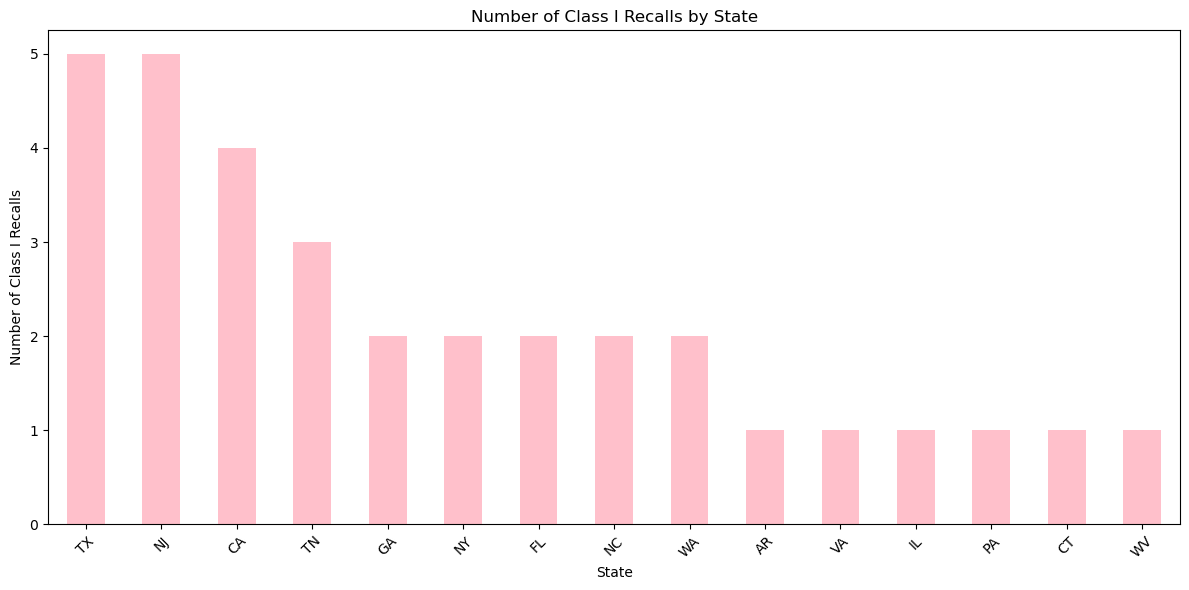

In [72]:
#Bar Graph of number of Class I recalls vs state
state_counts = classI_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='pink')
plt.title('Number of Class I Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class I Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classI_recalls.jpeg")
plt.show()


In [24]:
#Class II recall DataFrame
classII_df = US_recalls_df[US_recalls_df['Classification'] == 'Class II']

classII_df.head()


,Status,City,State,Country,Classification,Product Type,Recalling Firm,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Termination Date
1,Terminated,Parsippany,NJ,United States,Class II,Drugs,Teva Pharmaceuticals USA,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20210525
2,Terminated,Allegan,MI,United States,Class II,Drugs,Perrigo Company PLC,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20230929
4,Terminated,Dublin,OH,United States,Class II,Drugs,Cardinal Health Inc.,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20240617
5,Terminated,Dublin,OH,United States,Class II,Drugs,CARDINAL HEALTHCARE,"Enoxaparin Sodium Injection, USP, 150MG/ML Sin...",2 units,CGMP Deviations: Products were exposed to temp...,20220126,20240929
8,Terminated,Brookhaven,NY,United States,Class II,Drugs,"Amneal Pharmaceuticals of New York, LLC","Nizatidine Oral Solution, 15 mg/mL (75 mg/5mL)...",11258 bottles,CGMP Deviations: potential N-Nitrosodimethylam...,20200415,20210908


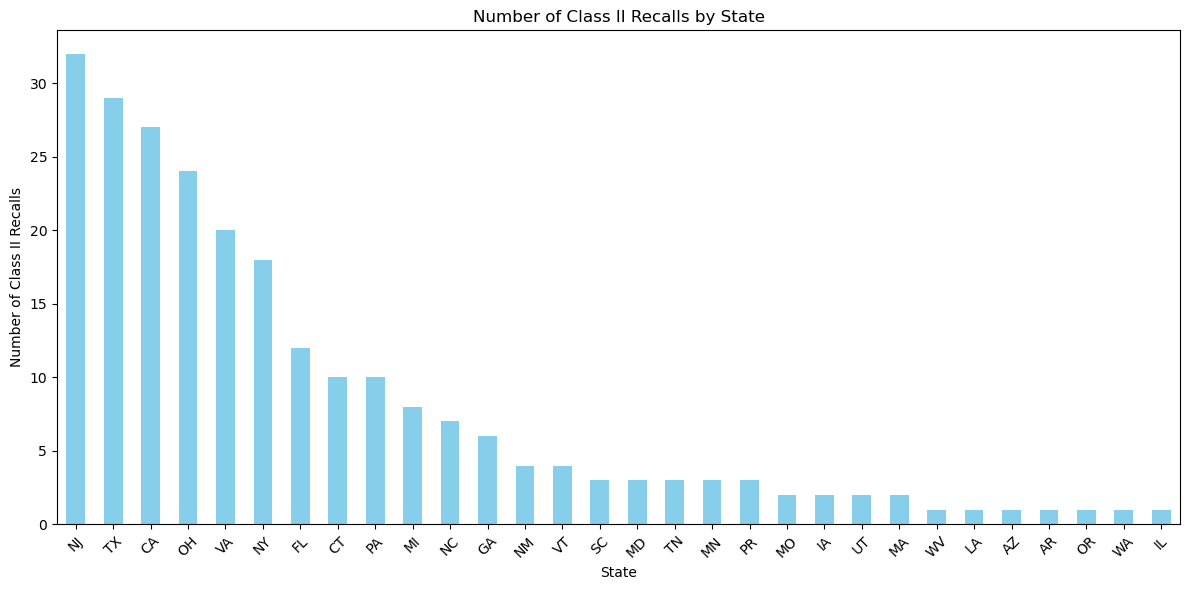

In [71]:
#Bar Graph of number of Class II recalls vs state
state_counts = classII_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Class II Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class II Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classII_recalls.jpeg")
plt.show()

In [25]:
#Class III recall DataFrame
classIII_df = US_recalls_df[US_recalls_df['Classification'] == 'Class III']

classIII_df.head()


,Status,City,State,Country,Classification,Product Type,Recalling Firm,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Termination Date
17,Terminated,Dublin,OH,United States,Class III,Drugs,Cardinal Health Inc.,"Tremfya (guselkumab) Injection, 100 mg/mL, one...",48 boxes,Temperature Abuse,20210309,20211104
45,Terminated,Parsippany,NJ,United States,Class III,Drugs,Teva Pharmaceuticals USA Inc,Azacitidine for Injection 100mg/vial Lyophiliz...,4162 cartons,Subpotent Drug - Out of specification (OOS) re...,20220722,20230412
69,Terminated,Morgantown,WV,United States,Class III,Drugs,Viatris,"Candesartan Cilexetil Tablets, USP 16 mg, 30 c...","21,094",Failed Impurities/Degradation Specifications; ...,20210913,20220428
78,Terminated,Princeton,NJ,United States,Class III,Drugs,"MACLEODS PHARMA USA, INC","Rizatriptan Benzoate Film Coated Tablets, 10 m...","135,082 Blister Packs/2,431,476 tablets",Out-of-specification test results obtained in ...,20211018,20240424
84,Terminated,Albany,OR,United States,Class III,Drugs,Dental Alliance Holdings LLC,"CTx7 Kit, contains one tube CariFree CTx4 Gel ...",3 single tubes of lot 192107 and 3 single tube...,Subpotent Drug: Product contains less Sodium F...,20211203,20220811


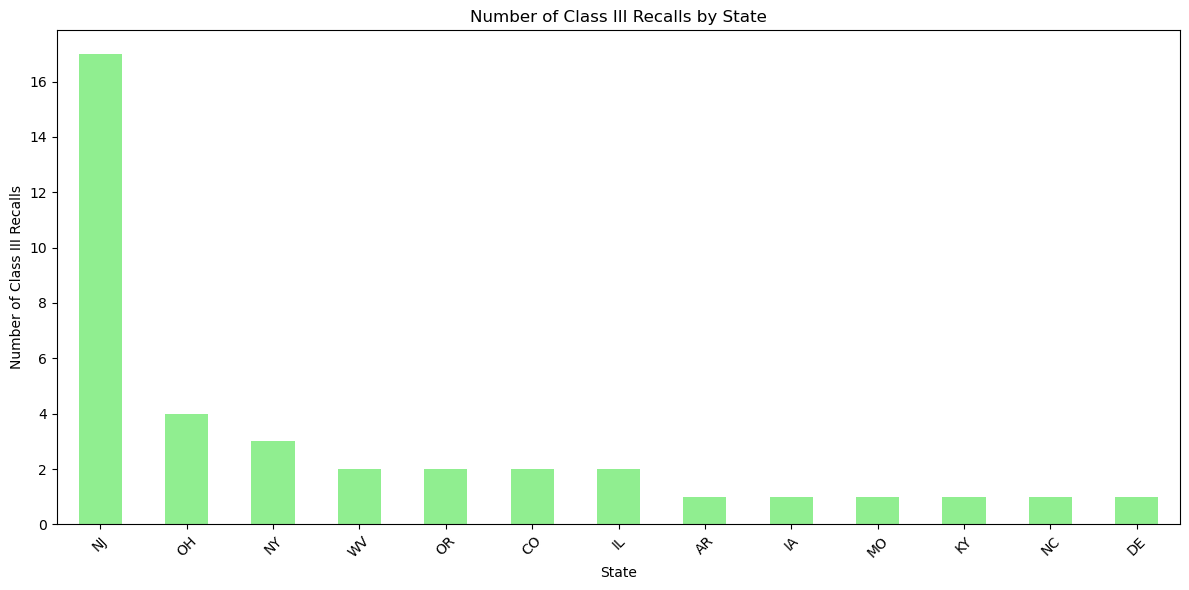

In [70]:
#Bar Graph of number of Class III recalls vs state
state_counts = classIII_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Class III Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class III Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classIII_recalls.jpeg")
plt.show()

In [67]:
#Which companies had the most recalls
#	-Which type of drugs did they have recalled.
company_counts = US_recalls_df['Recalling Firm'].value_counts()

# Get the top companies with the most recalls
top_companies = company_counts  

# Display top companies
print("Firms with the Most Recalls:")
print(top_companies)

# Filter the original DataFrame for the top companies
top_company_names = top_companies.index
top_recalls_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_company_names)]

# Group by company and type of drug
drug_types_by_company = top_recalls_df.groupby(['Recalling Firm', 'Classification']).size().reset_index(name='Recall Count')

# Display the result
print("\nDrug Types Recalled by Top Companies:")
drug_types_by_company

Firms with the Most Recalls:
Recalling Firm
Cardinal Health Inc.                                 18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy    18
Mckesson Medical-Surgical Inc. Corporate Office      16
Herbal Doctor Remedies                               10
Teva Pharmaceuticals USA                              8
                                                     ..
Fresenius Medical Care, North America                 1
Pink Toyz                                             1
Custopharm, Inc.                                      1
US Compounding Inc                                    1
Milbar Laboratories, Inc.                             1
Name: count, Length: 132, dtype: int64

Drug Types Recalled by Top Companies:


,Recalling Firm,Classification,Recall Count
0,"ANI Pharmaceuticals, Inc.",Class II,1
1,AVKARE Inc.,Class I,1
2,AVKARE Inc.,Class II,1
3,"Accord Healthcare, Inc.",Class I,1
4,"Accord Healthcare, Inc.",Class II,5
...,...,...,...
145,"Washington Homeopathic Products, Inc.",Class II,1
146,"Washington Homeopathic Products, Inc.",Class III,1
147,West-Ward Columbus Inc,Class II,1
148,Wilshire Pharmaceuticals Inc,Class II,1


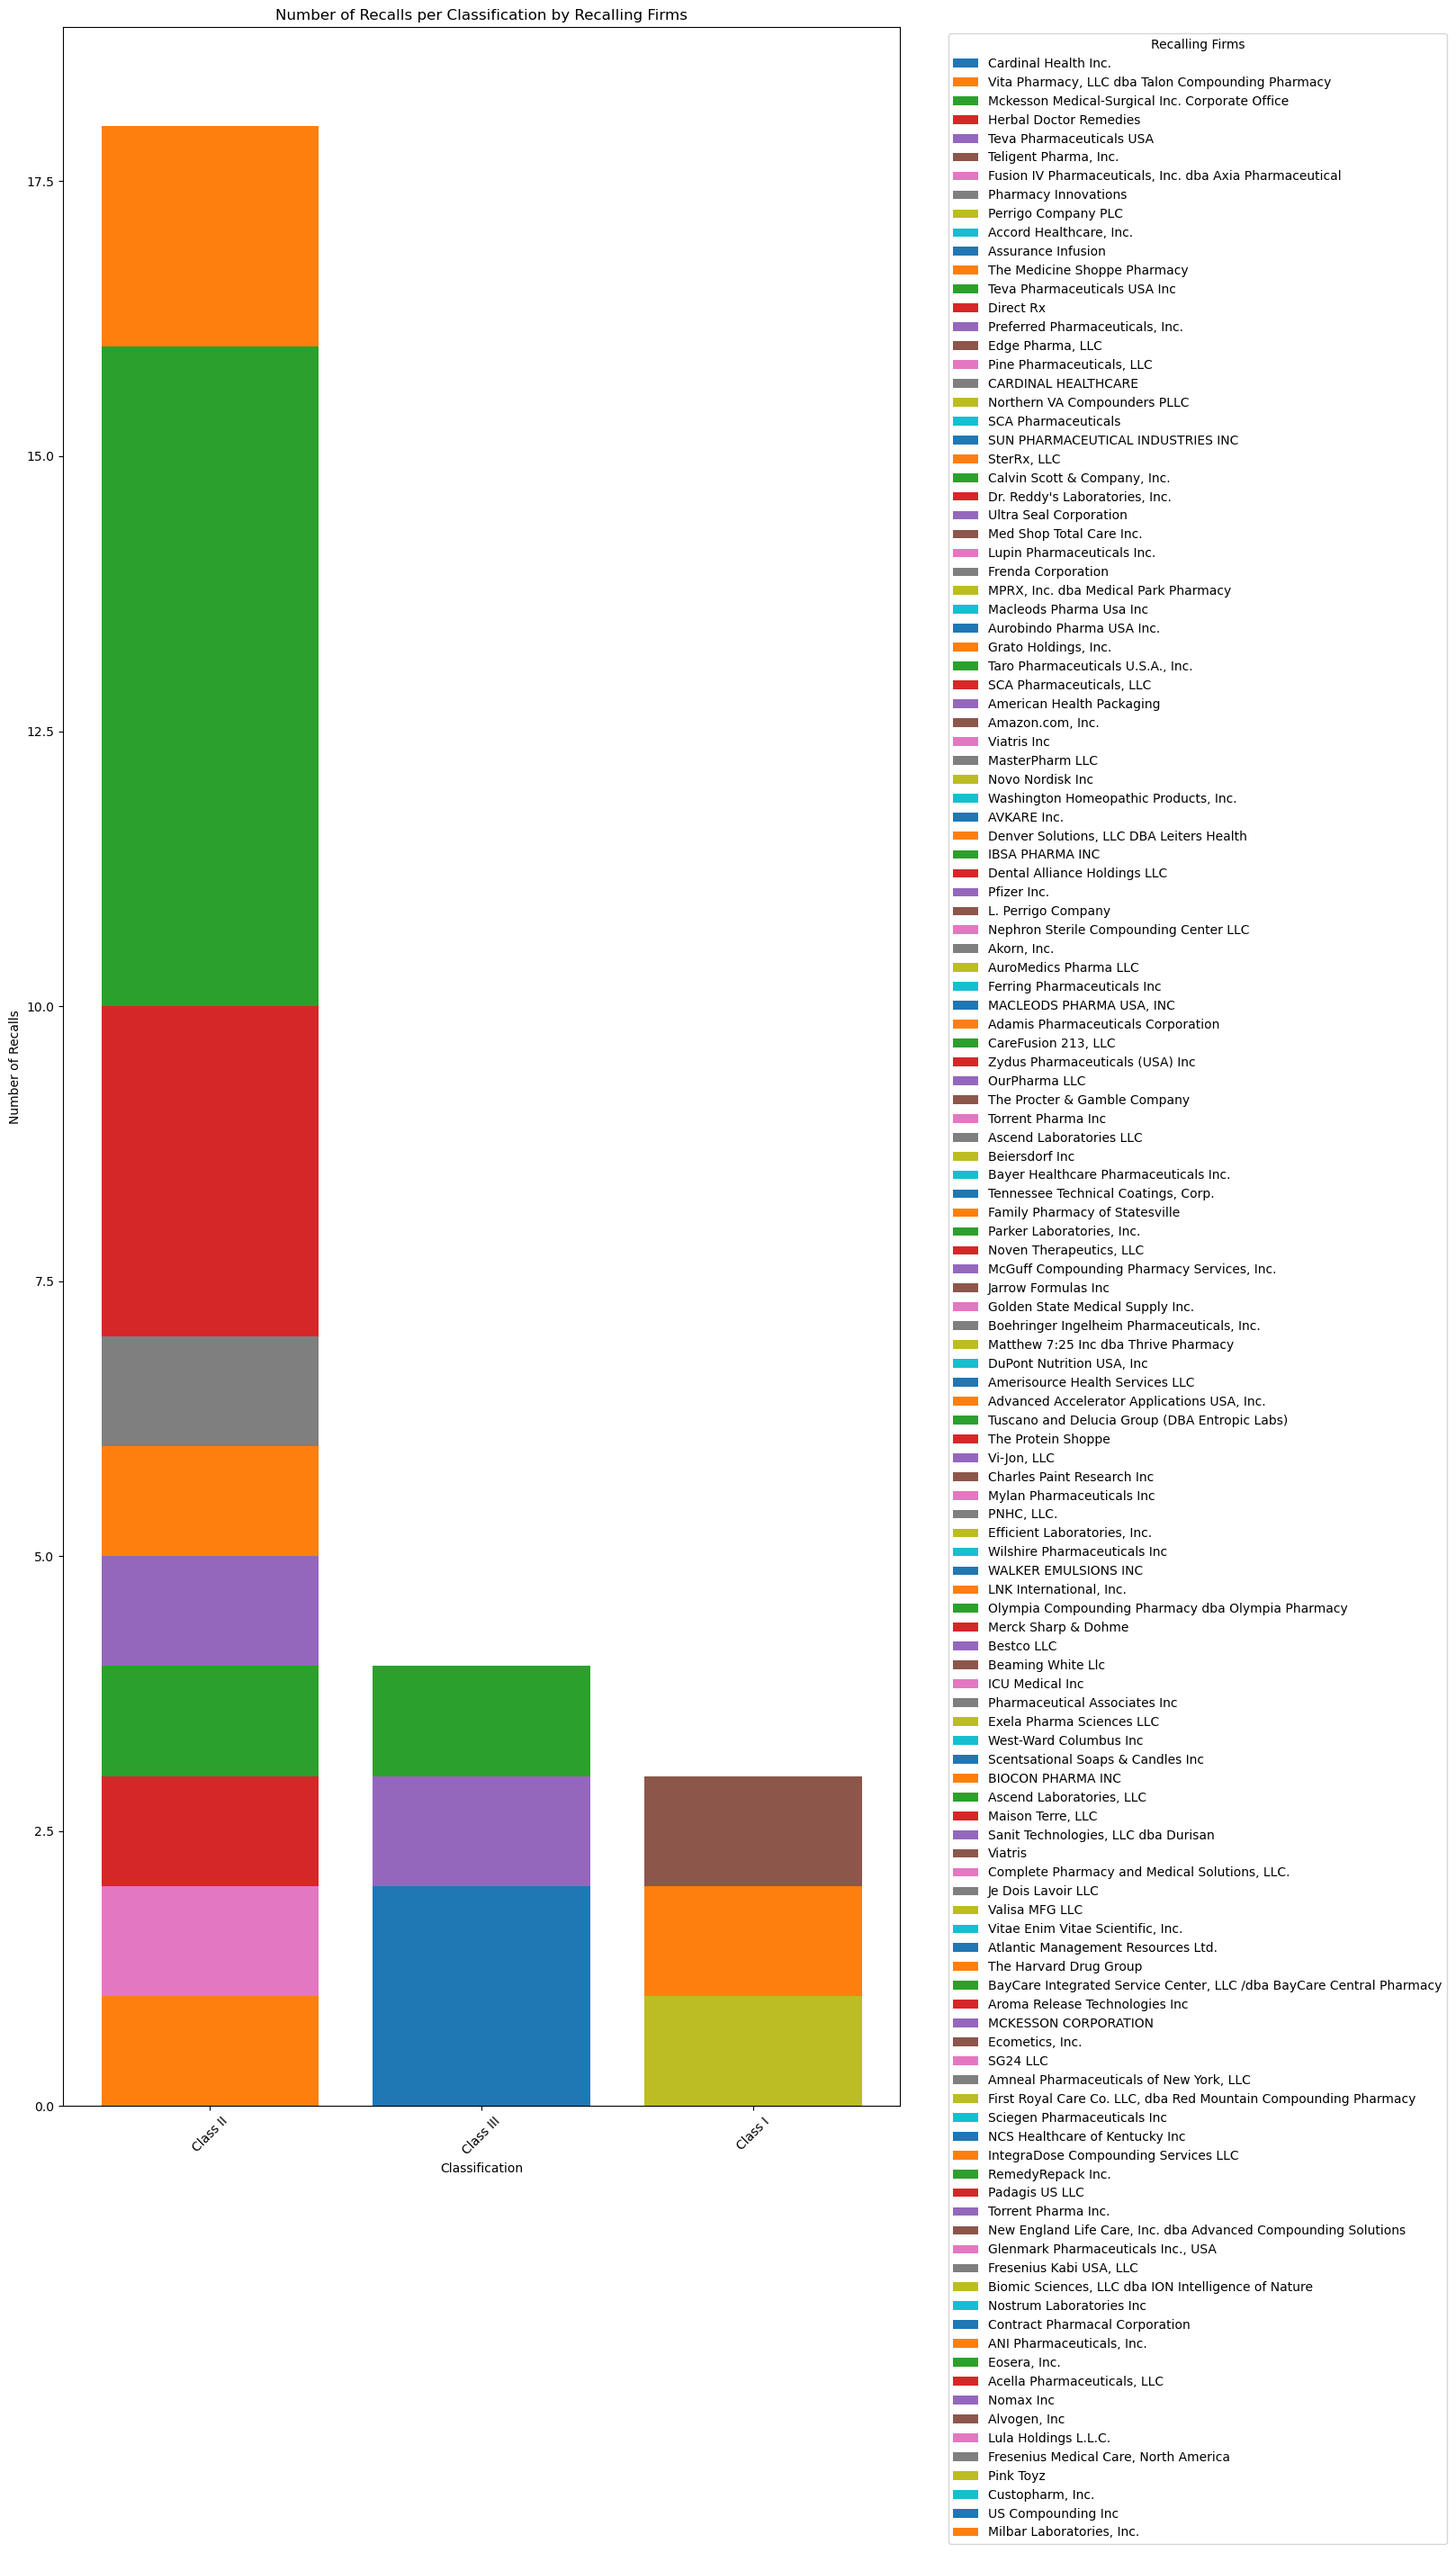

In [78]:
#Bar graph of Recalling Firms and number of recalls per Classification
plt.figure(figsize=(12, 30)) #sizes can be maniupulated to make graph visually appealing vs the legend
for firm in top_company_names:
    firm_data = drug_types_by_company[drug_types_by_company['Recalling Firm'] == firm]
    plt.bar(firm_data['Classification'], firm_data['Recall Count'], label=firm)

plt.title('Number of Recalls per Classification by Recalling Firms')
plt.xlabel('Classification')
plt.ylabel('Number of Recalls')
plt.xticks(rotation=45)
plt.legend(title='Recalling Firms', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()

plt.savefig(". ./output_data/number_recalls.jpeg")
plt.show()

In [42]:
#How much time it takes to close a recall.
#	-who took most time to recall.

# Convert date columns to datetime format (adjust column names as necessary)
US_recalls_df['Recall Initiation Date'] = pd.to_datetime(US_recalls_df['Recall Initiation Date'])
US_recalls_df['Termination Date'] = pd.to_datetime(US_recalls_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
US_recalls_df['Time to Close (Days)'] = (US_recalls_df['Termination Date'] - US_recalls_df['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall = US_recalls_df[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall.loc[longest_time_recall['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall.sort_values(by='Time to Close (Days)', ascending=False))


Firm that took the most time to close a recall:
Recalling Firm          Contract Pharmacal Corporation
Time to Close (Days)                            1540.0
Name: 33, dtype: object

Average Time to Close Recalls by Firm:
                                        Recalling Firm  Time to Close (Days)
33                      Contract Pharmacal Corporation                1540.0
84                             Noven Therapeutics, LLC                1539.0
127                               WALKER EMULSIONS INC                1440.0
51   Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...                1422.0
118      Tuscano and Delucia Group (DBA Entropic Labs)                1418.0
..                                                 ...                   ...
69                                   Maison Terre, LLC                 163.0
80   New England Life Care, Inc. dba Advanced Compo...                 147.0
72          McGuff Compounding Pharmacy Services, Inc.                 140.0
40      

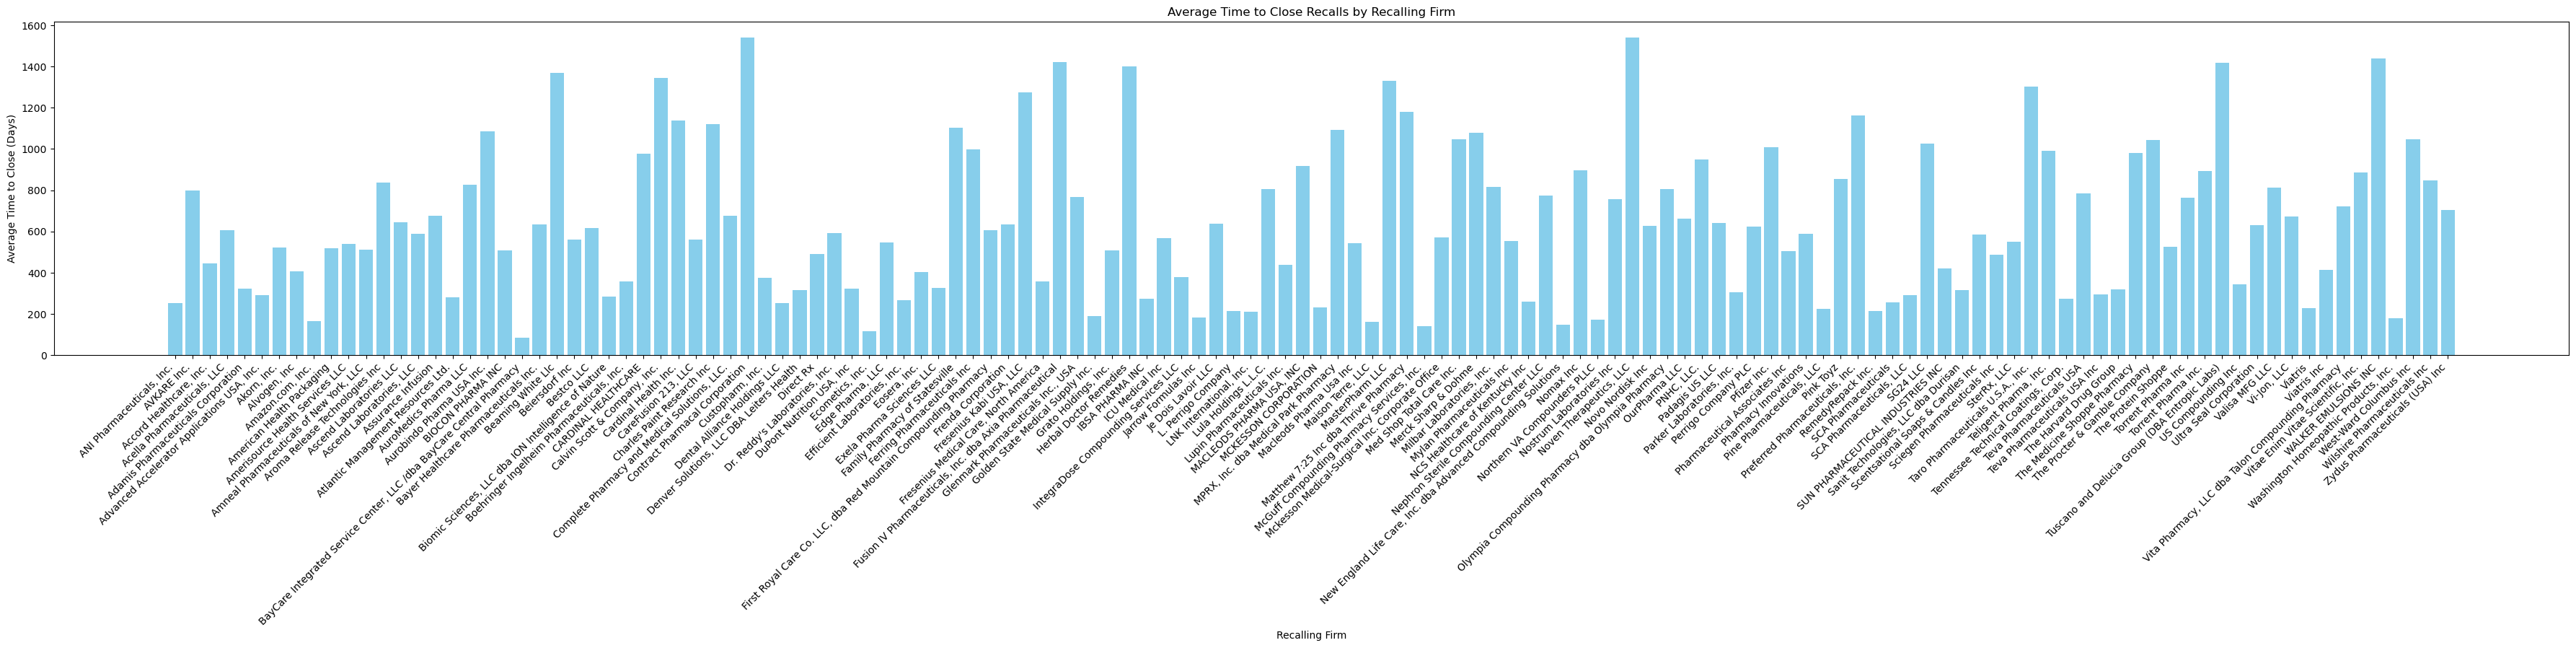

In [56]:
#Bar graph of Recall times
plt.figure(figsize=(45, 6))
plt.bar(longest_time_recall['Recalling Firm'], longest_time_recall['Time to Close (Days)'], color='skyblue')
plt.title('Average Time to Close Recalls by Recalling Firm')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/recall_time.jpeg")
plt.show()